## Title: Project 7: Apply Supervised Machine Learning - Simple Linear Regression
### Author: Tesfamariam
### Link: https://github.com/Tesfamariam100/datafun-07-applied


### dependancies


In [ ]:
import matplotlib
from matplotlib import pyplot as plt
import pandas
import pyarrow
import scipy
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

### Part 1 - Chart a Straight Line

#### Linear Relationships

Linear relationships exist between Fahrenheit and Celsius temperatures, where Celsius (dependent variable) is determined by Fahrenheit (independent variable) through the formula c = 5/9 ×(f−32). Plotting Fahrenheit against Celsius yields a straight line, demonstrated by computing Celsius equivalents for Fahrenheit temperatures 0–100 in 10-degree intervals and storing them as tuples in 'temps'

#### Visualizing Fahrenheit and Celsius Temperature Relationships

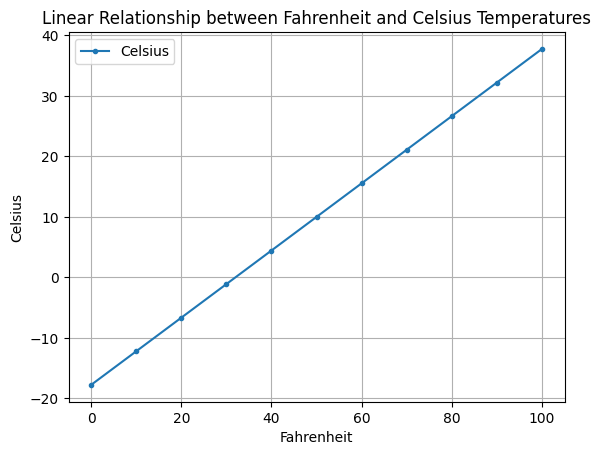

In [12]:
c = lambda f: 5 / 9 * (f - 32)

temps = [(f, c(f)) for f in range(0, 101, 10)]
[(f, c(f)) for f in range(0, 101, 10)]

#place the data in a DataFrame
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')
plt.title('Linear Relationship between Fahrenheit and Celsius Temperatures')

# Add a grid
plt.grid(True)

## (Part 2) - Predict Avg High Temp in NYC in January 

#### Loading the Average High Temperatures into a DataFrame

In [5]:
#loading and displaying the New York City data from ave_hi_nyc_jan_1895-2018.csv
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [6]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [8]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
